<a href="https://colab.research.google.com/github/keyreach29/Analyzing_the_loan_data/blob/main/Lendplus_Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AN ANALYSIS OF PAYMENT BEHAVIOUR OF LENDPLUS KENYA-OCTOBER PORTFOLIO**


In [ ]:
#Libaries Importation
# linear algebra
import numpy as np

# data processing
import pandas as pd

# For creating plots
import seaborn as sns

# For specifying the axes tick format
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')


import os
from sklearn import preprocessing

#data split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#label encoding
from sklearn.preprocessing import OneHotEncoder

# New section

# New section

# New Section

In [ ]:
Data=pd.read_csv("/content/october_portfolio.csv", error_bad_lines=False)
Data.head(50)

<ipython-input-17-fd0ff23e4ce0>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Data=pd.read_csv("/content/october_portfolio.csv", error_bad_lines=False)


,Loan id,Customer id,Customer name,Create at,Disbursed at,Product name,Principal,Tenor,State,Id number,Verifier,Closed at,DPD,Principal.1,Service fee,Late payment fee,Total,Number of extensions,Loan type
0,494461,703415,john Muchoki,2023-10-01T00:09:49+03:00,2023-10-01T00:09:56+03:00,PDLv10,2000,10,closed,27861640,NaN,2023-10-09T10:41:35+03:00,-1.0,0,0,0,0,0,Repeated
1,494462,1658304,Gladys Oduol,2023-10-01T00:18:52+03:00,2023-10-01T00:18:57+03:00,PDLv10,4000,15,closed,9951483,NaN,2023-10-13T21:52:20+03:00,-2.0,0,0,0,0,0,New
2,494463,460551,James ogolla,2023-10-01T00:21:25+03:00,2023-10-01T00:21:34+03:00,PDLv10,2500,15,active,24044848,NaN,NaN,5.0,2500,825,400,3805,0,Repeated
3,494464,679031,Justus Mutuku,2023-10-01T00:26:55+03:00,2023-10-01T00:27:01+03:00,PDLv10,13000,21,active,27550399,NaN,NaN,-1.0,13000,4204,0,17204,0,Repeated
4,494465,1012336,Rachel munyasa,2023-10-01T00:28:10+03:00,2023-10-01T00:28:15+03:00,PDLv10,2000,5,closed,30166697,NaN,2023-10-03T14:29:21+03:00,-2.0,0,0,0,0,0,Repeated
5,494466,848014,simon mbugua,2023-10-01T00:32:06+03:00,2023-10-01T00:32:14+03:00,PDLv10,10000,15,active,12760416,NaN,NaN,-11.0,10000,3300,0,13300,1,Repeated
6,494467,1658389,Ken Ngetich,2023-10-01T00:37:24+03:00,2023-10-01T00:37:30+03:00,PDLv10,2000,7,closed,12918578,NaN,2023-10-06T21:16:53+03:00,-1.0,0,0,0,0,0,New
7,494468,330322,evans oduk,2023-10-01T00:39:44+03:00,2023-10-01T00:39:48+03:00,PDLv10,7500,15,closed,24035291,NaN,2023-10-02T13:38:48+03:00,-13.0,0,0,0,0,0,Repeated
8,494469,1449103,Ibrahim abdulla,2023-10-01T01:24:04+03:00,2023-10-01T01:24:12+03:00,PDLv10,9500,15,active,29313560,NaN,NaN,-10.0,9500,3135,0,12635,1,Repeated
9,494470,1223118,Nancy Samuel,2023-10-01T01:47:21+03:00,2023-10-01T01:47:29+03:00,PDLv10,7000,15,closed,26373862,NaN,2023-10-15T08:55:43+03:00,0.0,0,0,0,0,0,Repeated


**DATA UNDESTANDING**

**DATA CLEANING**



In [ ]:
#check on the data types
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52780 entries, 0 to 52779
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan id               52780 non-null  int64  
 1   Customer id           52780 non-null  int64  
 2   Customer name         52780 non-null  object 
 3   Create at             52780 non-null  object 
 4   Disbursed at          52543 non-null  object 
 5   Product name          52780 non-null  object 
 6   Principal             52780 non-null  int64  
 7   Tenor                 52780 non-null  int64  
 8   State                 52780 non-null  object 
 9   Id number             52780 non-null  int64  
 10  Verifier              19832 non-null  object 
 11  Closed at             16546 non-null  object 
 12  DPD                   52543 non-null  float64
 13  Principal.1           52780 non-null  int64  
 14  Service fee           52780 non-null  int64  
 15  Late payment fee   

In [ ]:
Data.shape

(52780, 19)

In [ ]:
Data.columns.values

array(['Loan id', 'Customer id', 'Customer name', 'Create at',
       'Disbursed at', 'Product name', 'Principal', 'Tenor', 'State',
       'Id number', 'Verifier', 'Closed at', 'DPD', 'Principal.1',
       'Service fee', 'Late payment fee', 'Total', 'Number of extensions',
       'Loan type'], dtype=object)

In [ ]:
#we need to change the datatypes for the column names:  Disbursed at to date_time, Closed at to Date_time, Principal to float and  Total to float


In [ ]:
#starting with Disbursed at , Closed at  columns
Data['Disbursed at']=pd.to_datetime(Data['Disbursed at'],errors='coerce')
Data['Closed at']=pd.to_datetime(Data['Closed at'], errors='coerce')
Data = Data.dropna(subset=['Disbursed at','Closed at' ])

In [ ]:
#now we change Principal and Total columns datatypes to float respectively
Data['Principal']=pd.to_numeric(Data['Principal'], errors='coerce')
Data['Total']=pd.to_numeric(Data['Total'], errors='coerce')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16546 entries, 0 to 52675
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype                                
---  ------                --------------  -----                                
 0   Loan id               16546 non-null  int64                                
 1   Customer id           16546 non-null  int64                                
 2   Customer name         16546 non-null  object                               
 3   Create at             16546 non-null  object                               
 4   Disbursed at          16546 non-null  datetime64[ns, pytz.FixedOffset(180)]
 5   Product name          16546 non-null  object                               
 6   Principal             16546 non-null  int64                                
 7   Tenor                 16546 non-null  int64                                
 8   State                 16546 non-null  object                               


In [ ]:
Data.columns.values

array(['Loan id', 'Customer id', 'Customer name', 'Create at',
       'Disbursed at', 'Product name', 'Principal', 'Tenor', 'State',
       'Id number', 'Verifier', 'Closed at', 'DPD', 'Principal.1',
       'Service fee', 'Late payment fee', 'Total', 'Number of extensions',
       'Loan type'], dtype=object)

In [ ]:
#change the columns names to remove spaces in the names
Data.rename(columns={'Loan id': 'Loan_id', 'Customer id': 'Customer_id','Customer name': 'Customer_name','Create at':'Create_at', 'Disbursed at':'Disbursed_at', 'Product name': 'Product_name',
                    'Id number':'Id_number', 'Closed at':'Closed_at', 'Principal.1':'Principal_loan', 'Service fee':'Service_fee', 'Late payment fee':'Late_payment_fee',
                    'Number of extensions':'Number_of_extensions', 'Loan type':'Loan_type'}, inplace=True)


In [ ]:
Df1=Data
Df1.head(100)

,Loan_id,Customer_id,Customer_name,Create_at,Disbursed_at,Product_name,Principal,Tenor,State,Id_number,Verifier,Closed_at,DPD,Principal_loan,Service_fee,Late_payment_fee,Total,Number_of_extensions,Loan_type
0,494461,703415,john Muchoki,2023-10-01T00:09:49+03:00,2023-10-01 00:09:56+03:00,PDLv10,2000,10,closed,27861640,NaN,2023-10-09 10:41:35+03:00,-1.0,0,0,0,0,0,Repeated
1,494462,1658304,Gladys Oduol,2023-10-01T00:18:52+03:00,2023-10-01 00:18:57+03:00,PDLv10,4000,15,closed,9951483,NaN,2023-10-13 21:52:20+03:00,-2.0,0,0,0,0,0,New
4,494465,1012336,Rachel munyasa,2023-10-01T00:28:10+03:00,2023-10-01 00:28:15+03:00,PDLv10,2000,5,closed,30166697,NaN,2023-10-03 14:29:21+03:00,-2.0,0,0,0,0,0,Repeated
6,494467,1658389,Ken Ngetich,2023-10-01T00:37:24+03:00,2023-10-01 00:37:30+03:00,PDLv10,2000,7,closed,12918578,NaN,2023-10-06 21:16:53+03:00,-1.0,0,0,0,0,0,New
7,494468,330322,evans oduk,2023-10-01T00:39:44+03:00,2023-10-01 00:39:48+03:00,PDLv10,7500,15,closed,24035291,NaN,2023-10-02 13:38:48+03:00,-13.0,0,0,0,0,0,Repeated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,494624,1657988,Alga Wasonga,2023-10-01T08:30:24+03:00,2023-10-01 08:30:33+03:00,PDLv10,1000,7,closed,37710288,mike.kibet,2023-10-04 16:15:15+03:00,-3.0,0,0,0,0,0,New
165,494626,1452323,japhet mwongela,2023-10-01T08:30:40+03:00,2023-10-01 08:30:45+03:00,PDLv10,6000,15,closed,23783960,NaN,2023-10-12 09:19:44+03:00,-3.0,0,0,0,0,0,Repeated
166,494627,1657461,Gladys Mongo,2023-10-01T08:31:13+03:00,2023-10-01 08:31:19+03:00,PDLv10,1000,14,closed,31078109,edwin.sichangi,2023-10-12 09:50:17+03:00,-2.0,0,0,0,0,0,New
169,494630,1630754,Jackson kimuli,2023-10-01T08:31:19+03:00,2023-10-01 08:31:24+03:00,PDLv10,1500,15,closed,32543874,NaN,2023-10-03 09:28:28+03:00,-12.0,0,0,0,0,0,Repeated


In [ ]:
#check on  the missing values
Df1.isnull().sum()

Loan_id                    0
Customer_id                0
Customer_name              0
Create_at                  0
Disbursed_at               0
Product_name               0
Principal                  0
Tenor                      0
State                      0
Id_number                  0
Verifier                8630
Closed_at                  0
DPD                        0
Principal_loan             0
Service_fee                0
Late_payment_fee           0
Total                      0
Number_of_extensions       0
Loan_type                  0
dtype: int64

In [ ]:
# we realise the verifier columns has missing values of 10605, after keen investigation, we find that this is the ADE scoring model that made the decision. We can now replace the missing alues with the name 'ADE'
Df1['Verifier'].fillna('ADE', inplace=True)

In [ ]:
Df1.isnull().sum()

Loan_id                 0
Customer_id             0
Customer_name           0
Create_at               0
Disbursed_at            0
Product_name            0
Principal               0
Tenor                   0
State                   0
Id_number               0
Verifier                0
Closed_at               0
DPD                     0
Principal_loan          0
Service_fee             0
Late_payment_fee        0
Total                   0
Number_of_extensions    0
Loan_type               0
Principal.1             0
dtype: int64

In [ ]:
Df1.head(50)

,Loan_id,Customer_id,Customer_name,Create_at,Disbursed_at,Product_name,Principal,Tenor,State,Id_number,Verifier,Closed_at,DPD,Principal_loan,Service_fee,Late_payment_fee,Total,Number_of_extensions,Loan_type
0,494461,703415,john Muchoki,2023-10-01T00:09:49+03:00,2023-10-01 00:09:56+03:00,PDLv10,2000,10,closed,27861640,ADE,2023-10-09 10:41:35+03:00,-1.0,0,0,0,0,0,Repeated
1,494462,1658304,Gladys Oduol,2023-10-01T00:18:52+03:00,2023-10-01 00:18:57+03:00,PDLv10,4000,15,closed,9951483,ADE,2023-10-13 21:52:20+03:00,-2.0,0,0,0,0,0,New
4,494465,1012336,Rachel munyasa,2023-10-01T00:28:10+03:00,2023-10-01 00:28:15+03:00,PDLv10,2000,5,closed,30166697,ADE,2023-10-03 14:29:21+03:00,-2.0,0,0,0,0,0,Repeated
6,494467,1658389,Ken Ngetich,2023-10-01T00:37:24+03:00,2023-10-01 00:37:30+03:00,PDLv10,2000,7,closed,12918578,ADE,2023-10-06 21:16:53+03:00,-1.0,0,0,0,0,0,New
7,494468,330322,evans oduk,2023-10-01T00:39:44+03:00,2023-10-01 00:39:48+03:00,PDLv10,7500,15,closed,24035291,ADE,2023-10-02 13:38:48+03:00,-13.0,0,0,0,0,0,Repeated
9,494470,1223118,Nancy Samuel,2023-10-01T01:47:21+03:00,2023-10-01 01:47:29+03:00,PDLv10,7000,15,closed,26373862,ADE,2023-10-15 08:55:43+03:00,0.0,0,0,0,0,0,Repeated
10,494471,1411328,Gladys Kimani,2023-10-01T02:42:39+03:00,2023-10-01 02:42:44+03:00,PDLv10,9500,15,closed,25818006,ADE,2023-10-16 19:41:30+03:00,1.0,0,0,0,0,0,Repeated
11,494472,644304,samuel wanjiku,2023-10-01T03:17:50+03:00,2023-10-01 03:17:56+03:00,PDLv10,10000,9,closed,31328292,ADE,2023-10-09 08:51:22+03:00,0.0,0,0,0,0,0,Repeated
12,494473,1469648,ian muchuru,2023-10-01T03:45:10+03:00,2023-10-01 03:45:16+03:00,PDLv10,4000,22,closed,29217315,ADE,2023-10-11 12:11:17+03:00,-11.0,0,0,0,0,0,Repeated
13,494474,1459227,Josephat Ratemo,2023-10-01T04:07:21+03:00,2023-10-01 04:07:27+03:00,PDLv10,4500,15,closed,21415016,ADE,2023-10-12 08:26:55+03:00,-3.0,0,0,0,0,0,Repeated


In [ ]:
Df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16546 entries, 0 to 52675
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype                                
---  ------                --------------  -----                                
 0   Loan_id               16546 non-null  int64                                
 1   Customer_id           16546 non-null  int64                                
 2   Customer_name         16546 non-null  object                               
 3   Create_at             16546 non-null  object                               
 4   Disbursed_at          16546 non-null  datetime64[ns, pytz.FixedOffset(180)]
 5   Product_name          16546 non-null  object                               
 6   Principal             16546 non-null  int64                                
 7   Tenor                 16546 non-null  int64                                
 8   State                 16546 non-null  object                               


In [ ]:
columns_to_drop= ['Principal_loan','Loan_id','Customer_name','Customer_id',]
Df1.drop(columns=columns_to_drop, inplace=True)


In [ ]:
Df1.head()

,Create_at,Disbursed_at,Product_name,Principal,Tenor,State,Id_number,Verifier,Closed_at,DPD,Service_fee,Late_payment_fee,Total,Number_of_extensions,Loan_type
0,2023-10-01T00:09:49+03:00,2023-10-01 00:09:56+03:00,PDLv10,2000,10,closed,27861640,ADE,2023-10-09 10:41:35+03:00,-1.0,0,0,0,0,Repeated
1,2023-10-01T00:18:52+03:00,2023-10-01 00:18:57+03:00,PDLv10,4000,15,closed,9951483,ADE,2023-10-13 21:52:20+03:00,-2.0,0,0,0,0,New
4,2023-10-01T00:28:10+03:00,2023-10-01 00:28:15+03:00,PDLv10,2000,5,closed,30166697,ADE,2023-10-03 14:29:21+03:00,-2.0,0,0,0,0,Repeated
6,2023-10-01T00:37:24+03:00,2023-10-01 00:37:30+03:00,PDLv10,2000,7,closed,12918578,ADE,2023-10-06 21:16:53+03:00,-1.0,0,0,0,0,New
7,2023-10-01T00:39:44+03:00,2023-10-01 00:39:48+03:00,PDLv10,7500,15,closed,24035291,ADE,2023-10-02 13:38:48+03:00,-13.0,0,0,0,0,Repeated


**Finally we can now see our data is cleaned and ready for EDA ,we can save our data as cleaned_data**

In [ ]:
cleaned_data=Df1
cleaned_data.to_csv("/content/october_portfolio_modified.csv", index=False)

# **EXPLATORY DATA ANALYSIS (EDA)**

In [ ]:
#we need to investigate our data and get auctionable insigjts that will drive to business decisions


**Univariate Analysis**

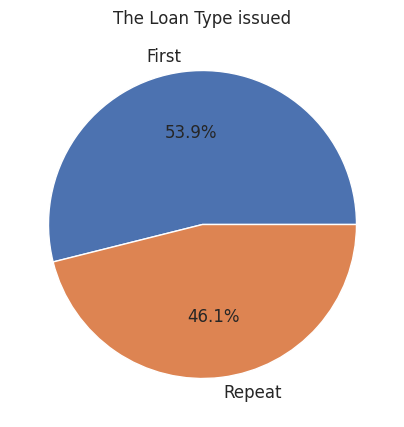

In [ ]:
#Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.
ax = (cleaned_data['Loan_type'].value_counts()*100.0 /len(cleaned_data))\
.plot.pie(autopct='%.1f%%', labels = ['First', 'Repeat'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('',fontsize = 12)
ax.set_title('The Loan Type issued', fontsize = 12)

plt.show()

WE Can see During the month of October, out of the 20865 loans issued, 56.1 % was First Loans while thr remaining 43.9 % was Repeat Loans

In [ ]:
#we can check the agents performance of agents/ ADE in relations of loans issued both First and Repeat loans

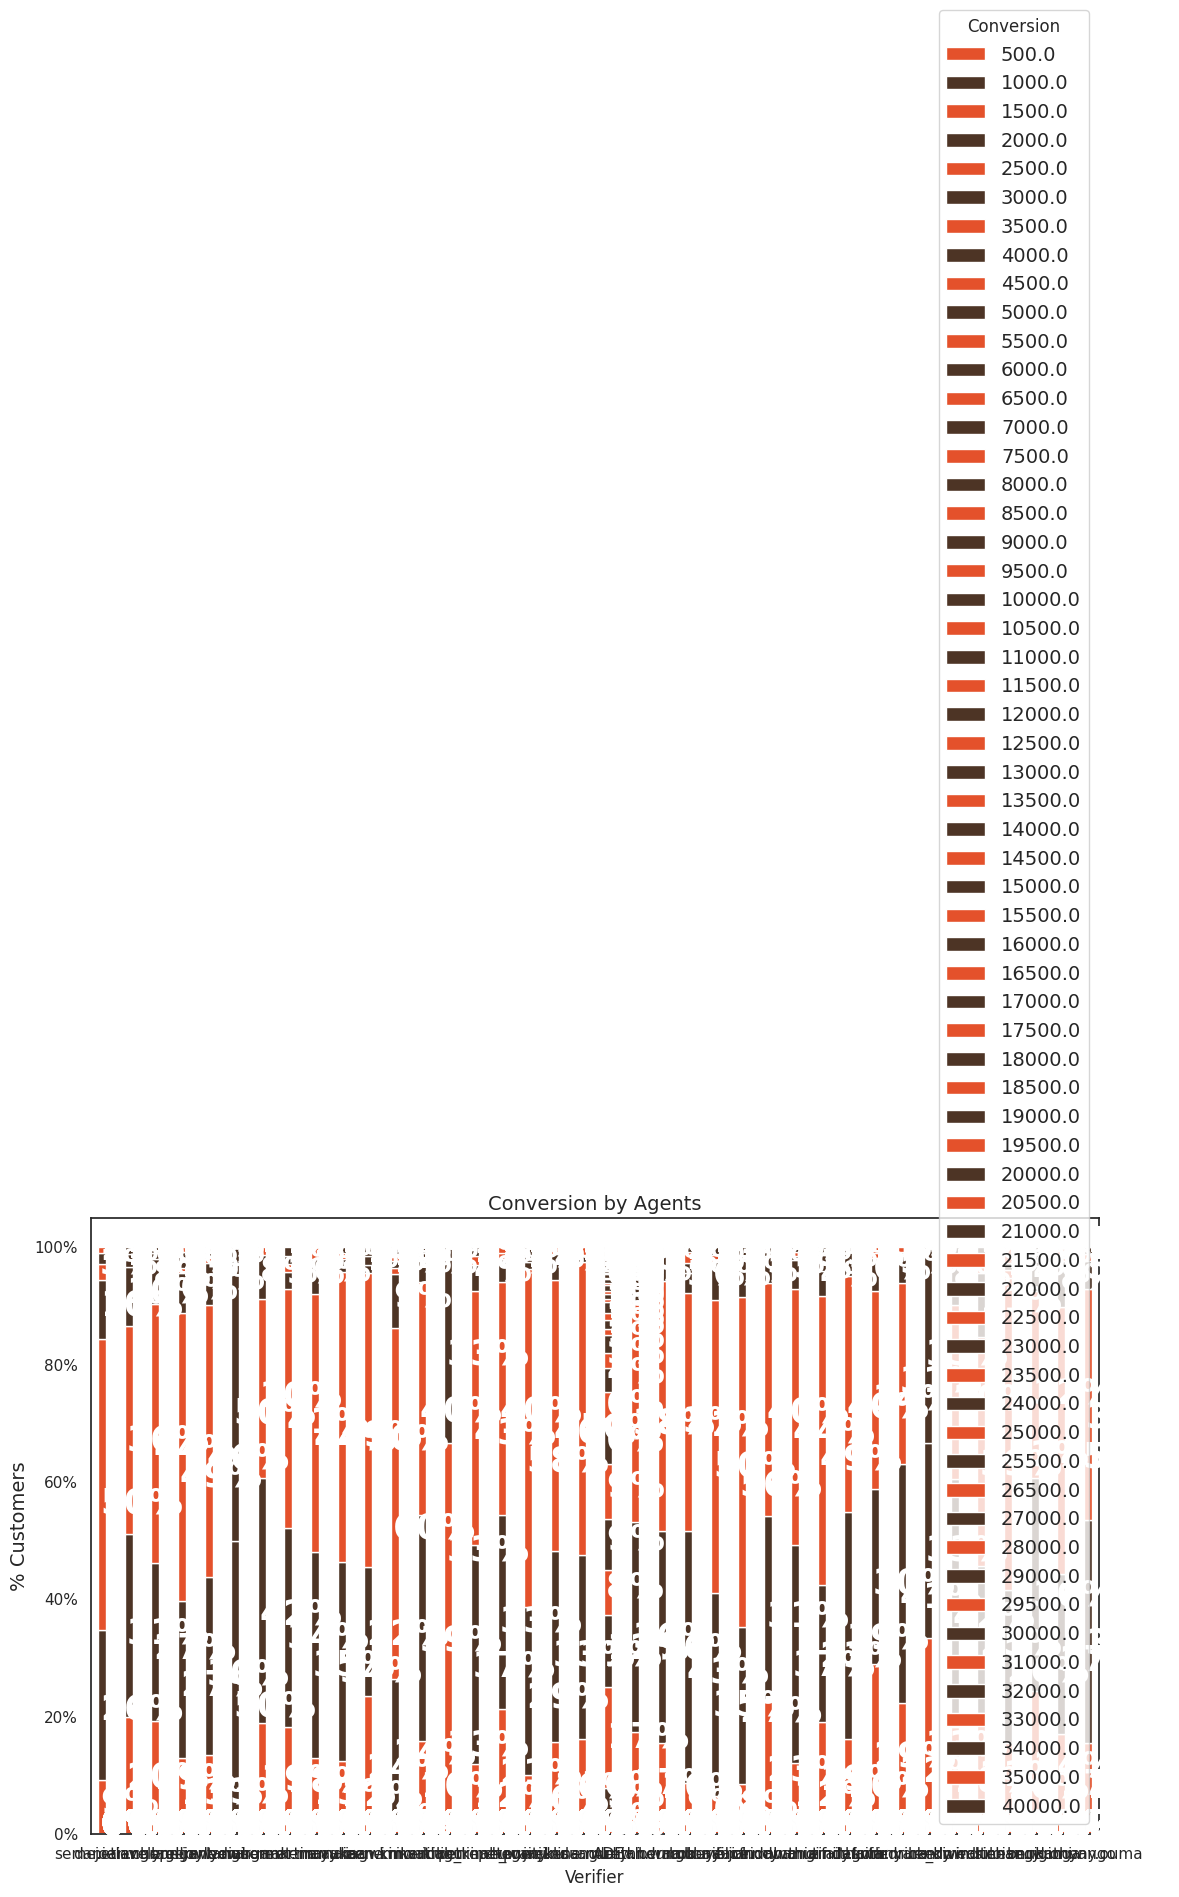

In [ ]:

colors = ['#E4512B', '#4D3425']
agents_performance = cleaned_data.groupby(['Verifier', 'Principal']).size().unstack()

# Calculate total percentage for each agent and sort
agents_total_percentage = (agents_performance.T * 100.0 / agents_performance.T.sum()).T
agents_total_percentage['Total_Percentage'] = agents_total_percentage.sum(axis=1)
agents_total_percentage_sorted = agents_total_percentage.sort_values(by='Total_Percentage', ascending=False)

# Plot the sorted stacked bar chart
ax = (agents_total_percentage_sorted.drop('Total_Percentage', axis=1)
      .plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(13, 8), color=colors))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Conversion')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Conversion by Agents', size=14)

# Adding labels on the sorted stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height), color='white', weight='bold', size=25)

plt.show()


In [ ]:

colors = ['#E4512B', '#4D3425']
agents_performance = cleaned_data.groupby(['Verifier', 'Principal']).size().unstack()

# Calculate total percentage for each agent and sort
agents_total_percentage = (agents_performance.T * 100.0 / agents_performance.T.sum()).T
agents_total_percentage['Total_Percentage'] = agents_total_percentage.sum(axis=1)
agents_total_percentage_sorted = agents_total_percentage.sort_values(by='Total_Percentage', ascending=False)

# Plot the sorted stacked bar chart
ax = (agents_total_percentage_sorted.drop('Total_Percentage', axis=1)
      .plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(13, 8), color=colors))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Conversion')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Conversion by Agents', size=14)

# Adding labels on the sorted stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height), color='white', weight='bold', size=25)



import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define loan types and their corresponding colors
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define loan types and their corresponding colors
loan_types = {
    '2000': '#1f77b4', '4000': '#ff7f0e', '7500': '#2ca02c', '7000': '#d62728', '9500': '#9467bd',
    '10000': '#8c564b', '4500': '#e377c2', '5000': '#7f7f7f', '1500': '#bcbd22', '3000': '#17becf',
    '2500': '#aec7e8', '3500': '#ffbb78', '10500': '#98df8a', '8500': '#ff9896', '12000': '#c5b0d5',
    '5500': '#c49c94', '8000': '#f7b6d2', '6000': '#c7c7c7', '1000': '#dbdb8d', '40000': '#9edae5',
    '500': '#393b79', '15000': '#5254a3', '20000': '#6b6ecf', '9000': '#9c9ede', '11500': '#637939',
    '35000': '#8ca252', '16500': '#b5cf6b', '16000': '#cedb9c', '23000': '#8c6d31', '14000': '#bd9e39',
    '15500': '#e7ba52', '6500': '#e7cb94', '24000': '#843c39', '25000': '#ad494a', '13000': '#d6616b',
    '17500': '#e7969c', '18500': '#7b4173', '11000': '#a55194', '14500': '#ce6dbd', '19000': '#de9ed6',
    '28000': '#3182bd', '27000': '#6baed6', '21500': '#9ecae1', '18000': '#c6dbef', '32000': '#e6550d',
    '23500': '#fd8d3c', '12500': '#fdae6b', '34000': '#fdd0a2', '31000': '#31a354', '33000': '#74c476',
    '13500': '#a1d99b', '29000': '#c7e9c0', '17000': '#756bb1', '20500': '#9e9ac8', '25500': '#bcbddc',
    '30000': '#dadaeb', '19500': '#636363', '29500': '#969696', '22000': '#bdbdbd', '21000': '#737373',
    '26500': '#969696', '22500': '#bdbdbd', '36000': '#dadaeb', '28500': '#636363', '31500': '#969696',
    '30500': '#bdbdbd', '39500': '#636363', '37000': '#969696', '32500': '#bdbdbd', '26000': '#636363',
    '27500': '#969696'
}

# Sort the DataFrame in ascending order
agents_total_percentage_sorted = agents_total_percentage.sort_values(by='Total_Percentage', ascending=True)

# Adjust the bar width and color palette based on loan types
ax = (agents_total_percentage_sorted.drop('Total_Percentage', axis=1)
      .plot(kind='bar', width=0.8, stacked=True, rot=0, figsize=(20, 10), color=[loan_types[col] for col in agents_total_percentage_sorted.columns[:-1]]))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set legend colors based on loan types
legend_colors = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=loan_types


# Adjust the bar width and color palette based on loan types
ax = (agents_total_percentage_sorted.drop('Total_Percentage', axis=1)
      .plot(kind='bar', width=0.8, stacked=True, rot=0, figsize=(15, 8), color=[loan_types[col] for col in agents_total_percentage_sorted.columns[:-1]]))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set legend colors based on loan types
legend_colors = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=loan_types[col], markersize=10) for col in agents_total_percentage_sorted.columns[:-1]]
ax.legend(legend_colors, agents_total_percentage_sorted.columns[:-1], loc='upper left', bbox_to_anchor=(1, 0.7), title='Loan Type')

ax.set_ylabel('% Customers', size=14)
ax.set_title('Conversion by Agents', size=14)

# Remove percentage annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('', (p.get_x() + width / 2, p.get_y() + height), ha='center')

# Adjust x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()







SyntaxError: '(' was never closed (<ipython-input-42-2519fd602692>, line 64)

In [ ]:
#lets check the 'verifier' columns and see how many Agennts we have
cleaned_data['Verifier'].unique()

array(['ADE', 'purity.ndungu', 'brelliant.owuor', 'seme.etiang',
       'peninah_wanjiku', 'edwin.sichangi', 'anthony.ouma',
       'brian.mwangi', 'evelyne.mwangi', 'faith.muendo', 'cynthia.ndegwa',
       'mike.kibet', 'elijah.wambura', 'fridah.mutinda', 'loise.nginga',
       'faith.manyara', 'andrew.ndungu', 'beryl.onyango', 'martin.maina',
       'bernard.ayilo', 'irene.mwathi', 'margaret.mayaka',
       'boniface.oduar', 'joan.chepngeno', 'daniel.murage',
       'peter.wekesa', 'maureen.kimani', 'medrine.mukami', 'henry.walter',
       'mugure.chege', 'monicah_kimeu', 'emily.korir', 'jackline.murithi',
       'lydiah.makena', 'bokeye.john', 'joyleen.serem', 'mary.kagwi',
       'fredrick_kivindu'], dtype=object)

ax = (cleaned_data['Verifier'].value_counts()*100.0 /len(cleaned_data))\
.plot.pie(autopct='%.1f%%', labels = ['ADE', 'purity.ndungu', 'brelliant.owuor', 'seme.etiang',
       'peninah_wanjiku', 'edwin.sichangi', 'anthony.ouma',
       'brian.mwangi', 'evelyne.mwangi', 'faith.muendo', 'cynthia.ndegwa',
       'mike.kibet', 'elijah.wambura', 'fridah.mutinda', 'loise.nginga',
       'faith.manyara', 'andrew.ndungu', 'beryl.onyango', 'martin.maina',
       'bernard.ayilo', 'irene.mwathi', 'margaret.mayaka',
       'boniface.oduar', 'joan.chepngeno', 'daniel.murage',
       'peter.wekesa', 'maureen.kimani', 'medrine.mukami', 'henry.walter',
       'mugure.chege', 'monicah_kimeu', 'emily.korir', 'jackline.murithi',
       'lydiah.makena', 'bokeye.john', 'joyleen.serem', 'mary.kagwi',
       'fredrick_kivindu'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('',fontsize = 12)
ax.set_title('The Loan Type issued', fontsize = 12)

plt.show()

In [ ]:


# Example data with modified 'Loan_type' values
cleaned_data = {
    'Verifier': ['ADE', 'purity.ndungu', 'brelliant.owuor', 'seme.etiang',
                 'peninah_wanjiku', 'edwin.sichangi', 'anthony.ouma',
                 'brian.mwangi', 'evelyne.mwangi', 'faith.muendo', 'cynthia.ndegwa',
                 'mike.kibet', 'elijah.wambura', 'fridah.mutinda', 'loise.nginga',
                 'faith.manyara', 'andrew.ndungu', 'beryl.onyango', 'martin.maina',
                 'bernard.ayilo', 'irene.mwathi', 'margaret.mayaka',
                 'boniface.oduar', 'joan.chepngeno', 'daniel.murage',
                 'peter.wekesa', 'maureen.kimani', 'medrine.mukami', 'henry.walter',
                 'mugure.chege', 'monicah_kimeu', 'emily.korir', 'jackline.murithi',
                 'lydiah.makena', 'bokeye.john', 'joyleen.serem', 'mary.kagwi',
                 'fredrick_kivindu']
    'Loan_type': ['Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat',
                  'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First',
                  'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat',
                  'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First',
                  'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat']
}

# Add placeholder 'Principal' data for each 'Verifier'
cleaned_data['Principal'] = [10000 for _ in cleaned_data['Verifier']]

colors = ['#E4512B', '#4D3425']

# Create a DataFrame from the modified example data
df = pd.DataFrame.from_dict(cleaned_data,orient='index')
df=df.transpose()

# Group by 'Verifier' and 'Loan_type', and calculate the total percentage
agents_performance = df.groupby(['Verifier', 'Loan_type']).size().unstack()


# Plot the sorted stacked horizontal bar chart
ax = (agents_performance_sorted.drop('Total_Percentage', axis=1)
      .plot(kind='barh', stacked=True, figsize=(12, 10), color=colors))

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Conversion')
ax.set_xlabel('% Customers', size=14)
ax.set_title('Conversion by Agents', size=14)

# Rotate 'verifier' names for better readability
plt.yticks(rotation=45, ha='right')

# Adding labels on the sorted stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(width), (x + width / 2, y + height / 2), color='white',
                weight='bold', size=10, ha='center', va='center')

plt.show()




SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-44-08717fb75bc7>, line 3)

In [ ]:


# Assuming 'Agent' is the column with agents' names, 'Loan_Type' is the column with loan types, and 'Loans_Issued' is the column with the number of loans issued.
# You may need to adjust the column names based on your actual dataset.

# Sample data
# Sample data
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Verifier': ['ADE', 'purity.ndungu', 'brelliant.owuor', 'seme.etiang', 'peninah_wanjiku',
                 'edwin.sichangi', 'anthony.ouma', 'brian.mwangi', 'evelyne.mwangi',
                 'faith.muendo', 'cynthia.ndegwa', 'mike.kibet', 'elijah.wambura',
                 'fridah.mutinda', 'loise.nginga', 'faith.manyara', 'andrew.ndungu',
                 'beryl.onyango', 'martin.maina', 'bernard.ayilo', 'irene.mwathi',
                 'margaret.mayaka', 'boniface.oduar', 'joan.chepngeno', 'daniel.murage',
                 'peter.wekesa', 'maureen.kimani', 'medrine.mukami', 'henry.walter',
                 'mugure.chege', 'monicah_kimeu', 'emily.korir', 'jackline.murithi',
                 'lydiah.makena', 'bokeye.john', 'joyleen.serem', 'mary.kagwi',
                 'fredrick_kivindu'],
    'Loan_type': ['Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat',
                  'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First',
                  'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat',
                  'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First',
                  'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat', 'First', 'Repeat'],
    'Principal': [2000, 4000, 7500, 7000, 9500, 10000, 4500, 5000, 1500, 3000, 2500, 3500,
                  10500, 8500, 12000, 5500, 8000, 6000, 1000, 40000, 500, 15000, 20000, 9000,
                  11500, 35000, 16500, 16000, 23000, 14000, 15500, 6500, 24000, 25000, 13000, 17500,
                  18500, 11000, 14500, 19000, 28000, 27000, 21500, 18000, 32000, 23500, 12500, 34000,
                  31000, 33000, 13500, 29000, 17000, 20500, 25500, 30000, 19500, 29500, 22000, 21000,
                  26500, 22500, 36000, 28500, 31500, 30500, 39500, 37000, 32500, 26000, 27500]
}

cleaned_data = pd.DataFrame(data)

# Pivot the data to have 'Repeat' and 'First' as separate columns
pivot_data = cleaned_data.pivot_table(index='Verifier', columns='Loan_type', values='Principal', aggfunc='sum', fill_value=0)

# Create a cumulative bar graph
cumulative_data = pivot_data.cumsum(axis=1)

# Plotting
cumulative_data.plot(kind='bar', stacked=True)
plt.xlabel('Agents')
plt.ylabel('Cumulative Loans Issued')
plt.title('Agents Performance - Cumulative Loans Issued')
plt.legend(title='Loan Type')
plt.show()




ValueError: All arrays must be of the same length

In [ ]:
cleaned_data['Loan_type'].unique()


array(['Repeated', 'New'], dtype=object)

In [ ]:
cleaned_data['Principal'].unique()

array([ 2000,  4000,  7500,  7000,  9500, 10000,  4500,  5000,  1500,
        3000,  2500,  3500, 10500,  8500, 12000,  5500,  8000,  6000,
        1000, 40000,   500, 15000, 20000,  9000, 11500, 35000, 16500,
       16000, 23000, 14000, 15500,  6500, 24000, 25000, 13000, 17500,
       18500, 11000, 14500, 19000, 28000, 27000, 21500, 18000, 32000,
       23500, 12500, 34000, 31000, 33000, 13500, 29000, 17000, 20500,
       25500, 30000, 19500, 29500, 22000, 21000, 26500, 22500, 36000,
       28500, 31500, 30500, 39500, 37000, 32500, 26000, 27500])

In [ ]:
unique_principals = cleaned_data['Principal'].unique()

# New section

In [ ]:
# Access the 'Principal' column and then use unique()
unique_principals = cleaned_data['Principal'].unique()

# Print or do something with the unique values
print(unique_principals)



[ 2000.  4000.  7500.  7000.  9500. 10000.  4500.  5000.  1500.  3000.
  2500.  3500. 10500.  8500. 12000.  5500.  8000.  6000.  1000. 40000.
   500. 15000. 20000.  9000. 11500. 35000. 16500. 16000. 23000. 14000.
 15500.  6500. 24000. 25000. 13000. 17500. 18500. 11000. 14500. 19000.
 28000. 27000. 21500. 18000. 32000. 23500. 12500. 34000. 31000. 33000.
 13500. 29000. 17000. 20500. 25500. 30000. 19500. 29500. 22000. 21000.
 26500. 22500. 36000. 28500. 31500. 30500. 39500. 37000. 32500. 26000.]


In [ ]:
print(cleaned_data.columns)



Index(['Create_at', 'Disbursed_at', 'Product_name', 'Principal', 'Tenor',
       'State', 'Id_number', 'Verifier', 'Closed_at', 'DPD', 'Service_fee',
       'Late_payment_fee', 'Total', 'Number_of_extensions', 'Loan_type'],
      dtype='object')


In [ ]:
# Access the 'Principal' column and then use unique()
unique_principals = cleaned_data['Principal'].unique()

# Print or do something with the unique values
print(unique_principals)



[ 2000  4000  7500  7000  9500 10000  4500  5000  1500  3000  2500  3500
 10500  8500 12000  5500  8000  6000  1000 40000   500 15000 20000  9000
 11500 35000 16500 16000 23000 14000 15500  6500 24000 25000 13000 17500
 18500 11000 14500 19000 28000 27000 21500 18000 32000 23500 12500 34000
 31000 33000 13500 29000 17000 20500 25500 30000 19500 29500 22000 21000
 26500 22500 36000 28500 31500 30500 39500 37000 32500 26000 27500]


In [ ]:
unique_principals1 = cleaned_data['Verifier'].unique()
print(unique_principals1)

['ADE' 'purity.ndungu' 'brelliant.owuor' 'seme.etiang' 'peninah_wanjiku'
 'edwin.sichangi' 'anthony.ouma' 'brian.mwangi' 'evelyne.mwangi'
 'faith.muendo' 'cynthia.ndegwa' 'mike.kibet' 'elijah.wambura'
 'fridah.mutinda' 'loise.nginga' 'faith.manyara' 'andrew.ndungu'
 'beryl.onyango' 'martin.maina' 'bernard.ayilo' 'irene.mwathi'
 'margaret.mayaka' 'boniface.oduar' 'joan.chepngeno' 'daniel.murage'
 'peter.wekesa' 'maureen.kimani' 'medrine.mukami' 'henry.walter'
 'mugure.chege' 'monicah_kimeu' 'emily.korir' 'jackline.murithi'
 'lydiah.makena' 'bokeye.john' 'joyleen.serem' 'mary.kagwi'
 'fredrick_kivindu']


In [ ]:
Code cell <undefined>
# %% [code]
#install the dtale package
%pip install dtale


SyntaxError: invalid syntax (<ipython-input-52-9bba7b8d15f7>, line 1)

In [ ]:
Code cell <undefined>
# %% [code]
#install the dtale package
%pip install dtale
Execution output
8KB
	Stream
		Requirement already satisfied: dtale in c:\users\user\anaconda3\lib\site-packages (3.7.0)
		Requirement already satisfied: dash-colorscales in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.0.4)
		Requirement already satisfied: dash-daq in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.5.0)
		Requirement already satisfied: Flask-Compress in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.14)
		Requirement already satisfied: future>=0.14.0 in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.18.2)
		Requirement already satisfied: kaleido in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.2.1)
		Requirement already satisfied: missingno in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.5.2)
		Requirement already satisfied: pandas in c:\users\user\anaconda3\lib\site-packages (from dtale) (2.1.1)
		Requirement already satisfied: squarify in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.4.3)
		Requirement already satisfied: strsimpy in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.2.1)
		Requirement already satisfied: six in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.16.0)
		Requirement already satisfied: xlrd in c:\users\user\anaconda3\lib\site-packages (from dtale) (2.0.1)
		Requirement already satisfied: beautifulsoup4 in c:\users\user\anaconda3\lib\site-packages (from dtale) (4.11.1)
		Requirement already satisfied: certifi in c:\users\user\anaconda3\lib\site-packages (from dtale) (2022.9.14)
		Requirement already satisfied: flask-ngrok in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.0.25)
		Requirement already satisfied: lz4 in c:\users\user\anaconda3\lib\site-packages (from dtale) (3.1.3)
		Requirement already satisfied: cycler in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.11.0)
		Requirement already satisfied: dash-bootstrap-components<=1.3.1 in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.3.1)
		Requirement already satisfied: networkx in c:\users\user\anaconda3\lib\site-packages (from dtale) (2.8.4)
		Requirement already satisfied: scikit-learn in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.3.1)
		Requirement already satisfied: seaborn in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.11.2)
		Requirement already satisfied: statsmodels in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.13.2)
		Requirement already satisfied: numpy in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.24.4)
		Requirement already satisfied: openpyxl!=3.2.0b1 in c:\users\user\anaconda3\lib\site-packages (from dtale) (3.0.10)
		Requirement already satisfied: xarray in c:\users\user\anaconda3\lib\site-packages (from dtale) (0.20.1)
		Requirement already satisfied: dash in c:\users\user\anaconda3\lib\site-packages (from dtale) (2.14.0)
		Requirement already satisfied: et-xmlfile in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.1.0)
		Requirement already satisfied: plotly in c:\users\user\anaconda3\lib\site-packages (from dtale) (5.9.0)
		Requirement already satisfied: Flask<2.3 in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.1.2)
		Requirement already satisfied: itsdangerous in c:\users\user\anaconda3\lib\site-packages (from dtale) (2.0.1)
		Requirement already satisfied: requests in c:\users\user\anaconda3\lib\site-packages (from dtale) (2.28.1)
		Requirement already satisfied: werkzeug<2.3 in c:\users\user\anaconda3\lib\site-packages (from dtale) (2.0.3)
		Requirement already satisfied: matplotlib in c:\users\user\anaconda3\lib\site-packages (from dtale) (3.5.2)
		Requirement already satisfied: scipy in c:\users\user\anaconda3\lib\site-packages (from dtale) (1.9.1)
		Requirement already satisfied: dash-html-components==2.0.0 in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (2.0.0)
		Requirement already satisfied: dash-core-components==2.0.0 in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (2.0.0)
		Requirement already satisfied: dash-table==5.0.0 in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (5.0.0)
		Requirement already satisfied: typing-extensions>=4.1.1 in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (4.3.0)
		Requirement already satisfied: retrying in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (1.3.4)
		Requirement already satisfied: ansi2html in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (1.8.0)
		Requirement already satisfied: nest-asyncio in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (1.5.5)
		Requirement already satisfied: setuptools in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (63.4.1)
		Requirement already satisfied: importlib-metadata in c:\users\user\anaconda3\lib\site-packages (from dash->dtale) (4.11.3)
		Requirement already satisfied: Jinja2>=2.10.1 in c:\users\user\anaconda3\lib\site-packages (from Flask<2.3->dtale) (2.11.3)
		Requirement already satisfied: click>=5.1 in c:\users\user\anaconda3\lib\site-packages (from Flask<2.3->dtale) (8.0.4)
		Requirement already satisfied: tenacity>=6.2.0 in c:\users\user\anaconda3\lib\site-packages (from plotly->dtale) (8.0.1)
		Requirement already satisfied: soupsieve>1.2 in c:\users\user\anaconda3\lib\site-packages (from beautifulsoup4->dtale) (2.3.1)
		Requirement already satisfied: brotli in c:\users\user\anaconda3\lib\site-packages (from Flask-Compress->dtale) (1.1.0)
		Requirement already satisfied: fonttools>=4.22.0 in c:\users\user\anaconda3\lib\site-packages (from matplotlib->dtale) (4.25.0)
		Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\user\anaconda3\lib\site-packages (from matplotlib->dtale) (1.4.2)
		Requirement already satisfied: packaging>=20.0 in c:\users\user\anaconda3\lib\site-packages (from matplotlib->dtale) (21.3)
		Requirement already satisfied: pillow>=6.2.0 in c:\users\user\anaconda3\lib\site-packages (from matplotlib->dtale) (9.2.0)
		Requirement already satisfied: pyparsing>=2.2.1 in c:\users\user\anaconda3\lib\site-packages (from matplotlib->dtale) (3.0.9)
		Requirement already satisfied: python-dateutil>=2.7 in c:\users\user\anaconda3\lib\site-packages (from matplotlib->dtale) (2.8.2)
		Requirement already satisfied: pytz>=2020.1 in c:\users\user\anaconda3\lib\site-packages (from pandas->dtale) (2022.1)
		Requirement already satisfied: tzdata>=2022.1 in c:\users\user\anaconda3\lib\site-packages (from pandas->dtale) (2023.3)
		Requirement already satisfied: charset-normalizer<3,>=2 in c:\users\user\anaconda3\lib\site-packages (from requests->dtale) (2.0.4)
		Requirement already satisfied: idna<4,>=2.5 in c:\users\user\anaconda3\lib\site-packages (from requests->dtale) (3.3)
		Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\user\anaconda3\lib\site-packages (from requests->dtale) (1.26.11)
		Requirement already satisfied: joblib>=1.1.1 in c:\users\user\anaconda3\lib\site-packages (from scikit-learn->dtale) (1.2.0)
		Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\user\anaconda3\lib\site-packages (from scikit-learn->dtale) (2.2.0)
		Requirement already satisfied: patsy>=0.5.2 in c:\users\user\anaconda3\lib\site-packages (from statsmodels->dtale) (0.5.2)
		Requirement already satisfied: colorama in c:\users\user\anaconda3\lib\site-packages (from click>=5.1->Flask<2.3->dtale) (0.4.5)
		Requirement already satisfied: MarkupSafe>=0.23 in c:\users\user\anaconda3\lib\site-packages (from Jinja2>=2.10.1->Flask<2.3->dtale) (2.0.1)
		Requirement already satisfied: zipp>=0.5 in c:\users\user\anaconda3\lib\site-packages (from importlib-metadata->dash->dtale) (3.8.0)
		Note: you may need to restart the kernel to use updated packages.

Code cell <undefined>
# %% [code]
# Data Handling
import pandas as pd
import dtale

Code cell <undefined>
# %% [code]
# Load The  Dataset
EDA = pd.read_csv("/content/october_portfolio.csv")
EDA.head()
Execution output
3KB
	text/plain
		ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
		0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
		1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
		2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
		3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
		4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive

Code cell <undefined>
# %% [code]
# Load The Test Dataset
EDA = pd.read_csv("")
EDA.head()
Execution output
3KB
	text/plain
		ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
		0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
		1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
		2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
		3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
		4  ICU200613    7  150  78  29  126  35.2  0.692   54          0

Code cell <undefined>
# %% [code]
# Conduct EDA using dtale library and open the analysis in browser
dtale.show(train_df).open_browser()
Execution output
1KB
	Stream
		C:\Users\user\anaconda3\lib\site-packages\dtale\ppscore\calculation.py:212: FutureWarning:

		is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

		2023-10-22 08:53:19,509 - INFO     - Executing shutdown due to inactivity...
		2023-10-22 08:53:28,032 - INFO     - Executing shutdown...
		C:\Users\user\anaconda3\lib\site-packages\dtale\app.py:441: UserWarning:

		The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.


SyntaxError: invalid decimal literal (<ipython-input-1-74fbce753269>, line 6)